# Análise dos Dados Coletados

Importação das bibliotecas Pandas e Matplotlib, utilizadas para analisar os dados coletados e plotagem do gráficos, respectivamente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Leitura dos dados coletados no Ambiente de Processamento Distribuído e criação de um Dataframe com estes dados.

In [2]:
data = pd.read_csv('src/output/distributed/log/pti_tpi3.txt', sep=";", header=None )
data.columns = ["image", "faces", "time"]

Tratamento do nome das imagens

In [3]:
for i in range(len(data["image"])):
    data["image"][i] = data["image"][i].split("_")[0]

/home/lucasemanuelbs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Leitura dos dados coletados no Ambiente de Processamento Centralizado e criação de um Dataframe com estes dados.

In [4]:
data_c = pd.read_csv('src/output/centralized/log/pti_tpi.txt', sep=";", header=None)
data_c.columns = ["image", "faces", "time"]

Tratamento do nome das imagens

In [5]:
for i in range(len(data_c["image"])):
    data_c["image"][i] = data_c["image"][i].split("_")[0]

/home/lucasemanuelbs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# TPI - Tempo de Processamento por Imagem

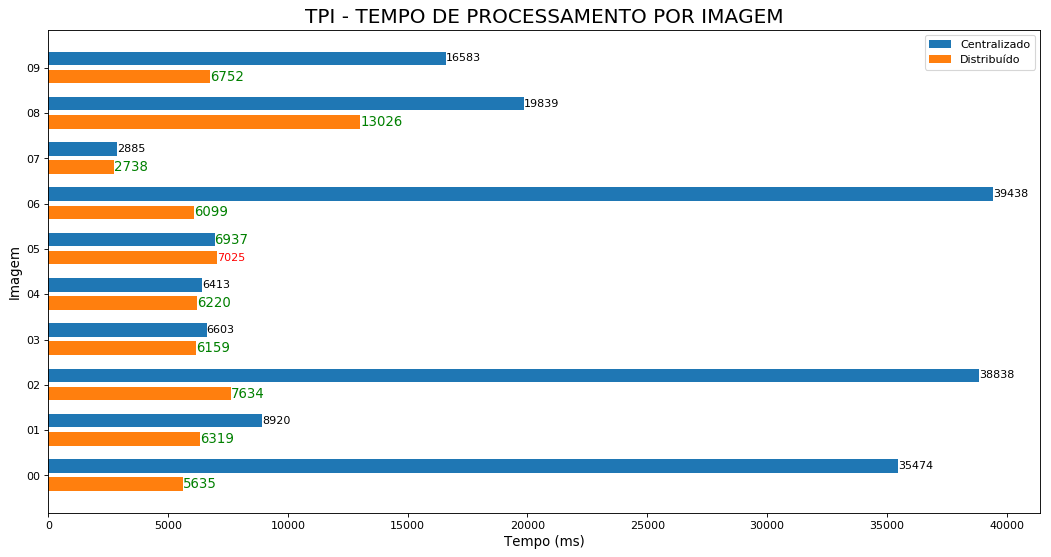

In [19]:
#  Create bars
barWidth = 0.3
bars1 = data.sort_values("image").reset_index().head(10).index 
bars2 = data_c.sort_values("image").reset_index().head(10).index -.4

# The X position of bars
r1 = data_c.sort_values("image")["time"].head(10).values
r2 = data.sort_values("image")["time"].head(10).values
r3 = r1 + r2

plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

# Create barplot
plt.barh(bars1, r1, height = barWidth, label='Centralizado')
plt.barh(bars2, r2, height = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot
plt.yticks([r - barWidth + .09 for r in range(len(r3))], data.sort_values("image")["image"])

# Create labels  
for i in range(len(r3)):
    if (r1[i] > r2[i]):
        color1 = 'black'
        color2 = 'green'
        size1 = 10
        size2 = 12
    else:
        color1 = 'green'
        color2 = 'red'
        size1 = 12
        size2 = 10
        
    plt.text(x = r1[i] , y = bars1[i], s = r1[i], size = size1, color=color1,
            horizontalalignment='left', verticalalignment='center')
    plt.text(x = r2[i] , y = bars2[i], s = r2[i], size = size2, color=color2,
            horizontalalignment='left', verticalalignment='center')

# Show graphic
plt.title("TPI - TEMPO DE PROCESSAMENTO POR IMAGEM",fontsize=18)
plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Imagem', fontsize=12)
plt.show()


In [35]:
a = data["image"]
data[(a == '00') | (a == '01') | (a == '02') | (a == '03') | (a == '04') | (a == '05') | (a == '06') | (a == '07') | (a == '08') | (a == '09')]

,image,faces,time
0,05,99,7025
12,06,62,6099
24,04,65,6220
36,07,154,2738
48,01,92,6319
49,09,38,6752
61,03,80,6159
74,02,119,7634
87,00,87,5635
88,08,173,13026


In [36]:
a = data_c["image"]
data_c[(a == '00') | (a == '01') | (a == '02') | (a == '03') | (a == '04') | (a == '05') | (a == '06') | (a == '07') | (a == '08') | (a == '09')]

,image,faces,time
0,02,119,38838
1,05,99,6937
2,08,173,19839
33,00,87,35474
34,03,80,6603
35,06,62,39438
36,09,38,16583
67,01,92,8920
68,04,65,6413
69,07,154,2885


# TPT - Tempo de Processamento Total

In [7]:
data_tpt = pd.read_csv('src/output/distributed/log/tpt3.txt', sep=";", header=None)
data_tpt.columns = ["tpt"]
data_tpt.values.max()

236100

In [8]:
data_tpt_c = pd.read_csv('src/output/centralized/log/tpt.txt', sep=";", header=None)
data_tpt_c.columns = ["tpt"]
data_tpt_c.values.max()

1974178

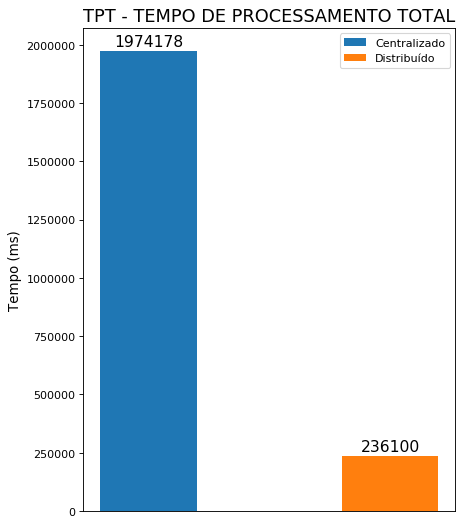

In [66]:
# Create bars
barWidth = 1
bars1 = data_tpt_c.values.max()
bars2 = data_tpt.values.max()

# The X position of bars
r1 = 1
r2 = r1 + barWidth + 1.5
r3 = r1 + r2

plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')

# Create barplot
plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
 
plt.text(x = r1 , y = bars1 + 20000, s = bars1, horizontalalignment='center', size = 14 )
plt.text(x = r2 , y = bars2 + 20000, s = bars2, horizontalalignment='center', size = 14 )
    
# Show graphic
plt.title("TPT - TEMPO DE PROCESSAMENTO TOTAL",fontsize=16)
plt.ylabel('Tempo (ms)', fontsize=12)
# plt.ylabel('Imagem', fontsize=12)
plt.show()

# FDI - Faces Detectadas por Imagem

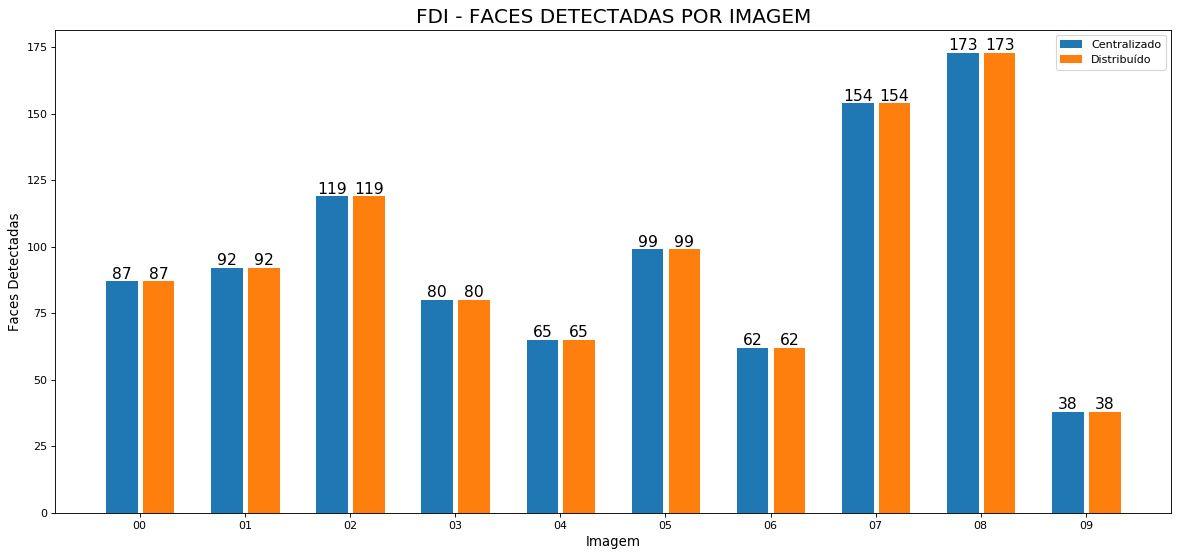

In [21]:
# Create bars
barWidth = 0.3
bars1 = data_c.sort_values("image")["faces"].head(10).values
bars2 = data.sort_values("image")["faces"].head(10).values

# The X position of bars
r1 = data_c.sort_values("image").reset_index().head(10).index -.35
r2 = data.sort_values("image").reset_index().head(10).index 
r3 = r1 + r2

plt.figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r - barWidth + .12 for r in range(len(r3))], data.sort_values("image")["image"])
 
for i in range(len(r3)):
    plt.text(x = r1[i] , y = bars1[i]+ 1, s = bars1[i], horizontalalignment='center', size = 14 )
    plt.text(x = r2[i] , y = bars2[i]+ 1, s = bars2[i], horizontalalignment='center', size = 14 )
    
# Create labels  
# Show graphic
plt.title("FDI - FACES DETECTADAS POR IMAGEM",fontsize=18)
plt.ylabel('Faces Detectadas', fontsize=12)
plt.xlabel('Imagem', fontsize=12)
plt.show()

# TFD - Total de Faces Detectadas

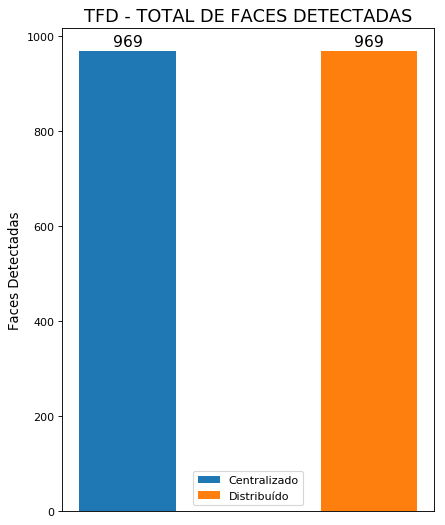

In [65]:
# Create bars
barWidth = 1
bars1 = data_c.sort_values("image")["faces"].head(10).values.sum()
bars2 = data.sort_values("image")["faces"].head(10).values.sum()

# The X position of bars
r1 = 1
r2 = r1 + barWidth + 1.5
r3 = r1 + r2

plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
 
plt.text(x = r1 , y = bars1 + 10, s = bars1, horizontalalignment='center', size = 14 )
plt.text(x = r2 , y = bars2 + 10, s = bars2, horizontalalignment='center', size = 14 )
    
# Create labels  
# Show graphic
plt.title("TFD - TOTAL DE FACES DETECTADAS",fontsize=16)
# plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Faces Detectadas', fontsize=12)
plt.show()

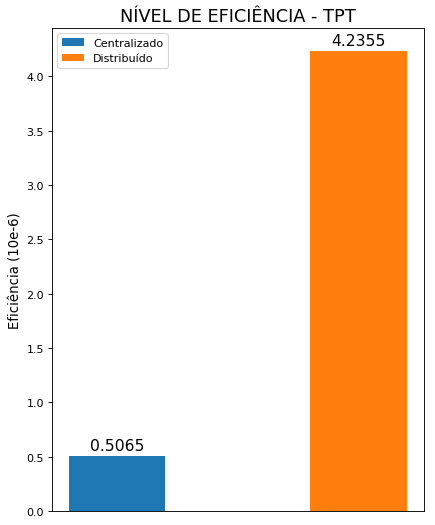

In [87]:
# Create bars
barWidth = 1
bars1 = round(1000000 / data_tpt_c.values.max(),4) 
bars2 = round(1000000 / data_tpt.values.max(),4)

# The X position of bars
r1 = 1
r2 = r1 + barWidth + 1.5
r3 = r1 + r2

plt.figure(num=None, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
# Create barplot
plt.bar(r1, bars1 , width = barWidth, label='Centralizado')
plt.bar(r2, bars2, width = barWidth, label='Distribuído')

# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
 
plt.text(x = r1 , y = bars1+ 0.05, s = bars1, horizontalalignment='center', size = 14 )
plt.text(x = r2 , y = bars2+ 0.05, s = bars2, horizontalalignment='center', size = 14 )
    
# Create labels  
# Show graphic
plt.title("NÍVEL DE EFICIÊNCIA - TPT",fontsize=16)
# plt.xlabel('Tempo (ms)', fontsize=12)
plt.ylabel('Eficiência (10e-6)', fontsize=12)
plt.show()

In [93]:
data.sort_values("image")[20:40]

,image,faces,time
26,20,252,11224
2,21,217,6806
14,22,81,9079
38,23,134,859
90,24,137,3042
51,25,109,10179
77,26,53,15539
64,27,91,9049
27,28,217,9489
3,29,211,14447


In [ ]:
zero_dezenove = [96,
154,
125,
86,
70,
116,
70,
155,
203,
68,
74,
234,
114,
231,
155,
60,
165,
167,
153,
157]
vinte_trintaenova= [276,303,84,]